<a href="https://colab.research.google.com/github/MhammadRezaValiYari/GoldTransectionAnalysisLinearRegression/blob/main/GoldTransectionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import essesional library

In [212]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

read data from drive

In [213]:
data = yf.download('GC=F', start='2023-12-26', end='2024-12-26')
data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


In [214]:
data.head(2)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,,
2023-12-26,2058.199951,2058.199951,2060.800049,2054.199951,2060.000000,64
2023-12-27,2081.899902,2081.899902,2081.899902,2064.800049,2067.300049,586


In [215]:
def clean_columns(data):
  if 'Date' in data.columns:
      data = data.set_index('Date')
  data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]
  data.columns = [col.replace('GC=F', ' ') for col in data.columns]
  if data.index.name == "Date":
      data = data.reset_index()

In [216]:
clean_columns(data)

In [217]:
data.head(2)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-12-26,2058.199951,2058.199951,2060.800049,2054.199951,2060.000000,64
2023-12-27,2081.899902,2081.899902,2081.899902,2064.800049,2067.300049,586


In [218]:
data = data.reset_index()

In [219]:
data.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-12-26,2058.199951,2058.199951,2060.800049,2054.199951,2060.000000,64
1,2023-12-27,2081.899902,2081.899902,2081.899902,2064.800049,2067.300049,586


In [220]:
data.columns

Index(['Date', 'Adj Close  ', 'Close  ', 'High  ', 'Low  ', 'Open  ',
       'Volume  '],
      dtype='object')

In [221]:
Series = data[['Date', 'Close  ']]

In [222]:
Series.head(2)

,Date,Close
0,2023-12-26,2058.199951
1,2023-12-27,2081.899902


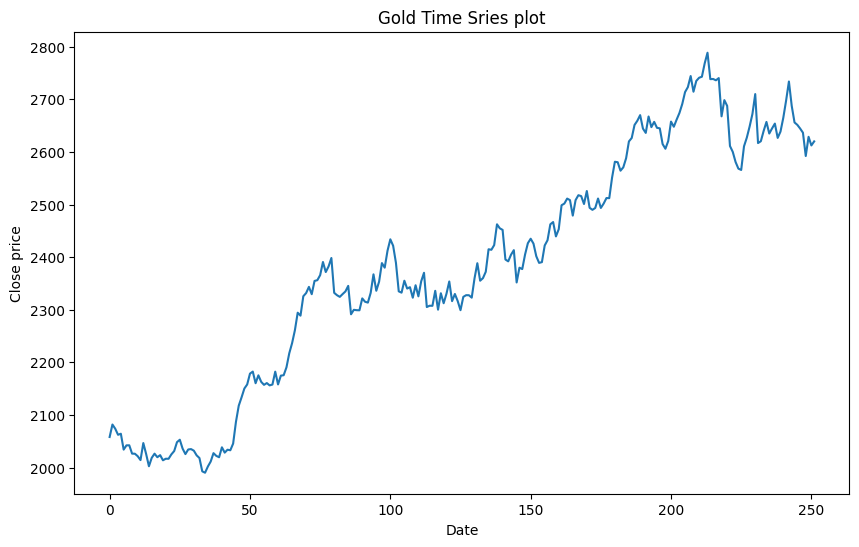

In [223]:
plt.figure(figsize=(10, 6))
plt.plot(Series['Close  '])
plt.title('Gold Time Sries plot')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show()

## Decomposition

In [224]:
Series

,Date,Close
0,2023-12-26,2058.199951
1,2023-12-27,2081.899902
2,2023-12-28,2073.899902
3,2023-12-29,2062.399902
4,2024-01-02,2064.399902
...,...,...
247,2024-12-18,2636.500000
248,2024-12-19,2592.199951
249,2024-12-20,2628.699951
250,2024-12-23,2612.300049


In [225]:
Series.fillna(method='bfill', inplace=True)

<ipython-input-225-dfb7635d2cb5>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Series.fillna(method='bfill', inplace=True)
<ipython-input-225-dfb7635d2cb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Series.fillna(method='bfill', inplace=True)


In [226]:
Series

,Date,Close
0,2023-12-26,2058.199951
1,2023-12-27,2081.899902
2,2023-12-28,2073.899902
3,2023-12-29,2062.399902
4,2024-01-02,2064.399902
...,...,...
247,2024-12-18,2636.500000
248,2024-12-19,2592.199951
249,2024-12-20,2628.699951
250,2024-12-23,2612.300049


In [228]:
# set to Daily time frame
Series['Date'] = pd.to_datetime(Series['Date'])
Series = Series.set_index('Date').asfreq('D')

<ipython-input-228-97ef34f7ee22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Series['Date'] = pd.to_datetime(Series['Date'])


In [229]:
from statsmodels.tsa.seasonal import seasonal_decompose


decompose_result = seasonal_decompose(Series['Close  '], model='additive')
decompose_result.plot()
plt.show()

ValueError: This function does not handle missing values